##### H0 = No difference in the mean of population or group 
##### Ha = There is difference in the mean of population or group 
##### Alpha = 0.05 

In [2]:
  library(tidyverse)
  library(datarium)
  library(ggstatsplot) 
  library(ISLR)
  library(ISLR2)
  library(readxl)
  library(dplyr) 
  library(gapminder)
  library(psych)
  library(effectsize)
  library(GGally)
  library(PerformanceAnalytics)
  library(dlookr)
  library(flextable) 
  library(survival)
  library(MVN)
  library(tinystatr)
  library(ggplot2)
  library(ggpubr)
  library(emmeans)
  library(quantreg)
  library(sjPlot)
  library(rsample)
  library(tidymodels)
  library(SmartEDA)
  library(summarytools)
  library(gtsummary)
  library(DataExplorer)
  library(report)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167


Attache Paket: ‘ISLR2’


Die folgenden Objekte sind maskiert von ‘package:ISLR’:

    Auto, Credit



Attache Paket: ‘psych’


Die folgenden Objekte sind maskiert von ‘package:ggplot2’:

    %+%, alpha



Attache Paket: ‘effectsize’


Das folgende Objekt ist maskiert ‘package:

### read data from library datarium

In [3]:
dataan <- anxiety
dataan

id,group,t1,t2,t3
<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,grp1,14.1,14.4,14.1
2,grp1,14.5,14.6,14.3
3,grp1,15.7,15.2,14.9
4,grp1,16.0,15.5,15.3
5,grp1,16.5,15.8,15.7
6,grp1,16.9,16.5,16.2
7,grp1,17.0,16.8,16.5
8,grp1,17.0,17.1,16.6
9,grp1,17.3,16.9,16.5


In [4]:
dataan_longer <- dataan %>%
  pivot_longer(cols = 3:5,
               names_to = "observation",
               values_to = "reads")
dataan_longer

id,group,observation,reads
<fct>,<fct>,<chr>,<dbl>
1,grp1,t1,14.1
1,grp1,t2,14.4
1,grp1,t3,14.1
2,grp1,t1,14.5
2,grp1,t2,14.6
2,grp1,t3,14.3
3,grp1,t1,15.7
3,grp1,t2,15.2
3,grp1,t3,14.9


In [5]:
# we check the data for normal distribution
shapiro.test(dataan_longer $ reads) 


	Shapiro-Wilk normality test

data:  dataan_longer$reads
W = 0.98698, p-value = 0.2316


#### Bartlett test: to check the homogeneity of variances

In [6]:
bartlett.test(reads ~ observation, data = dataan_longer)


	Bartlett test of homogeneity of variances

data:  reads by observation
Bartlett's K-squared = 3.3527, df = 2, p-value = 0.1871


In [7]:
aov_model <- aov(reads ~ observation, data = dataan_longer)
summary(aov_model)

             Df Sum Sq Mean Sq F value   Pr(>F)    
observation   2   66.6   33.29   10.84 4.38e-05 ***
Residuals   132  405.4    3.07                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [8]:
TukeyHSD(aov_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reads ~ observation, data = dataan_longer)

$observation
            diff       lwr         upr     p adj
t2-t1 -0.7800000 -1.655747  0.09574702 0.0914210
t3-t1 -1.7177778 -2.593525 -0.84203076 0.0000236
t3-t2 -0.9377778 -1.813525 -0.06203076 0.0327338


In [9]:
write.csv(dataan_longer, "anxity.csv")

### just testing ####

In [10]:
# Set seed for reproducibility
set.seed(123)

# Generate sample data
pre_test <- rnorm(20, mean = 10, sd = 2)
post_test <- pre_test + rnorm(20, mean = 2, sd = 1)

# Create a data frame
data <- data.frame(PreTest = pre_test, PostTest = post_test)


data


PreTest,PostTest
<dbl>,<dbl>
8.879049,9.811225
9.539645,11.321670
13.117417,14.091412
10.141017,11.412126
10.258575,11.633536
13.430130,13.743437
10.921832,13.759619
7.469878,9.623251
8.626294,9.488157


In [11]:
# Perform Wilcoxon Signed Rank Test
wilcox.test(data$PreTest, data$PostTest, paired = TRUE)



	Wilcoxon signed rank exact test

data:  data$PreTest and data$PostTest
V = 0, p-value = 1.907e-06
alternative hypothesis: true location shift is not equal to 0


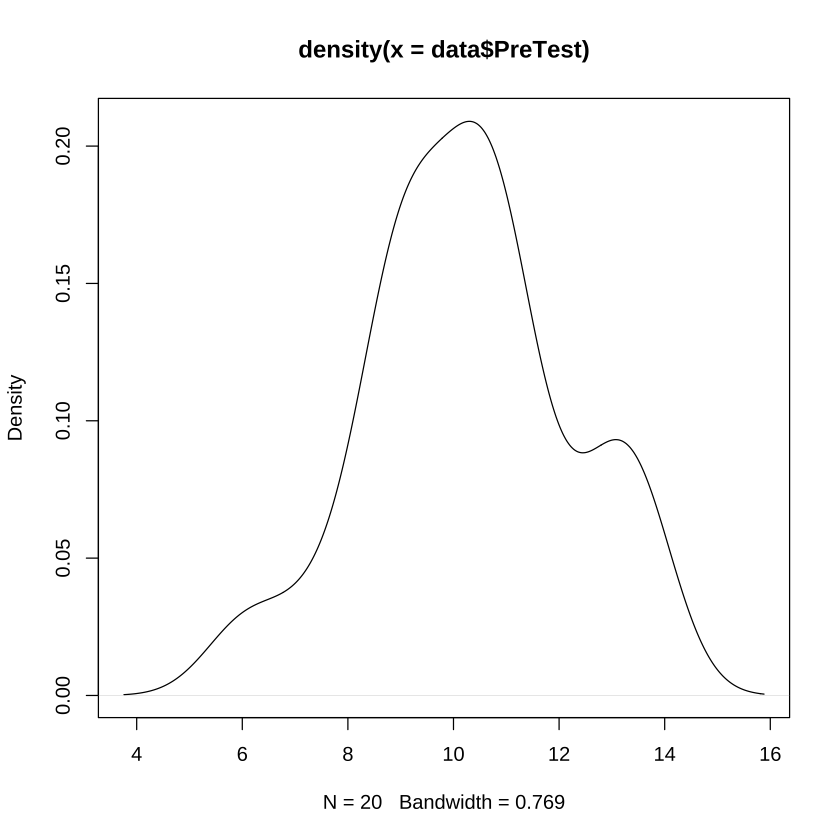

integer(0)


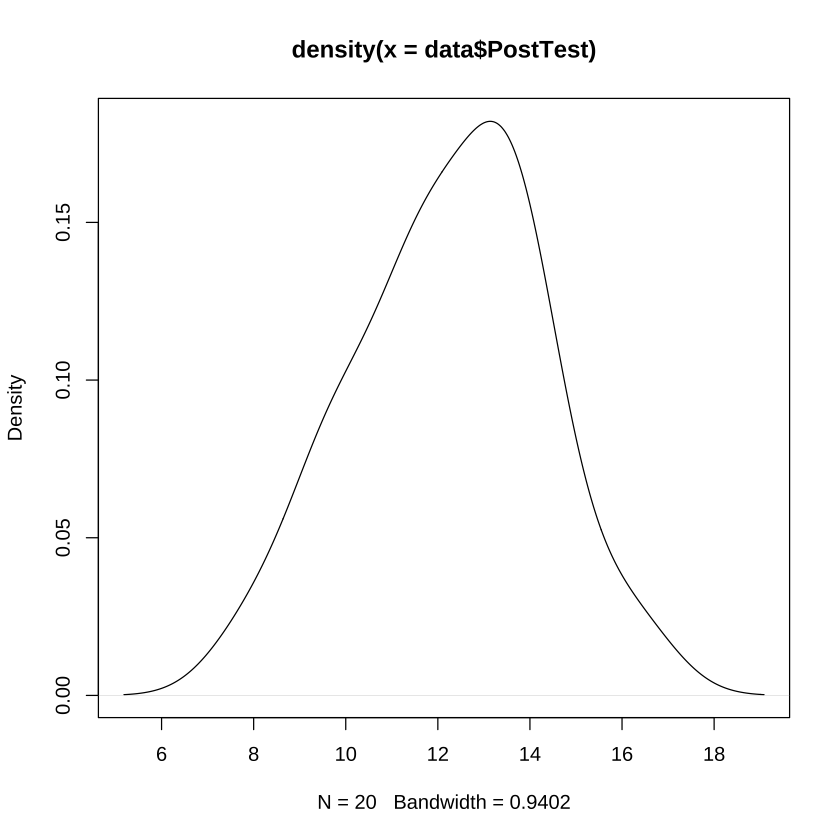

In [12]:
test1 <- plot(density(data$PreTest))
test2 <- plot(density(data$PostTest))
test <- test1+ test2
print(test)

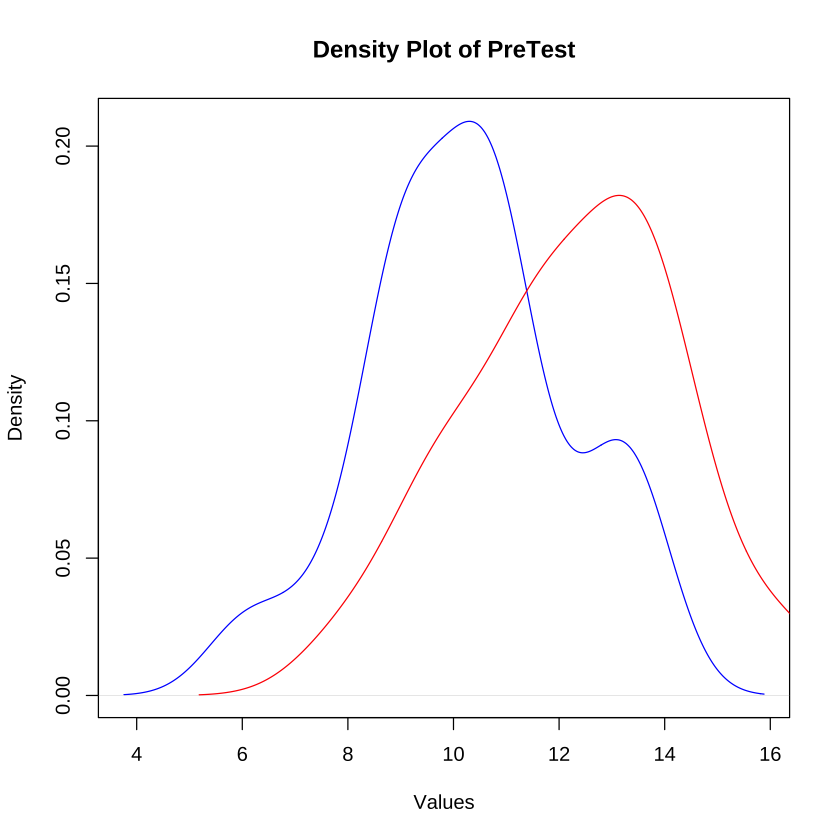

In [13]:
# Plot density of PreTest
test1 <- density(data$PreTest)
plot(test1, main = "Density Plot of PreTest", xlab = "Values", col = "blue")

# Add abline to the first plot
##abline(v = mean(data$PreTest), col = "green", lwd = 2)

# Plot density of PostTest
test2 <- density(data$PostTest)
lines(test2, col = "red")

# Add abline to the second plot
#abline(v = mean(data$PostTest), col = "orange", lwd = 2)

# Add legend
#legend("topright", legend = c("PreTest", "PostTest"), col = c("blue", "red"), lty = 1)

# Print the plot



In [14]:
mean(data$PreTest)
mean(data$PostTest)

[1] 10.28325

[1] 12.23199

In [15]:
cd133DMSO = read.delim("/Volumes/NGS/Myytcode/codeforytv/CD133 DMSO Control normalized (RMA).txt")
cd133EXP = read.delim("/Volumes/NGS/Myytcode/codeforytv/CD133 DMSO Experiment normalized (RMA).txt")

In [16]:
allcd133 <- left_join(cd133DMSO, cd133EXP, by = "ID")
allcd133

ID,DMSO.CD133.N.1.ga.cel,DMSO.CD133.N.2.ga.cel,DMSO.CD133.N.3.ga.cel,DMSO.CD133.NR.ga.cel,DMSO.CD133.P.1.ga.cel,DMSO.CD133.P.2.ga.cel,DMSO.CD133.P.3.ga.cel,DMSO.CD133.PR.ga.cel
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007_PM_s_at,8.885362,8.613698,7.628713,7.640883,8.736861,8.600804,7.498251,7.506411
1053_PM_at,5.594371,5.864095,7.250735,7.039113,6.046368,6.106366,7.227457,7.044297
117_PM_at,3.151293,3.359443,2.987656,3.127865,3.379536,3.386184,3.071770,3.067604
121_PM_at,5.728864,5.608865,5.518192,5.694289,5.630234,5.570508,5.610709,5.846937
1255_PM_g_at,2.885118,2.664795,2.623704,2.678880,2.762519,2.739002,2.657027,2.718653
1294_PM_at,3.888597,3.940705,3.362582,3.293179,3.514136,3.563783,3.218820,3.360508
1316_PM_at,4.926180,4.931900,5.033186,4.571066,4.822719,4.706626,4.740242,4.981946
1320_PM_at,3.773307,3.534339,3.671815,3.466012,3.389212,3.618355,3.554816,3.620228
1405_PM_i_at,2.288410,2.319572,2.186705,2.326173,2.275394,2.243246,2.243262,2.364399


In [17]:
allcd133_1 <- allcd133 %>% 
select(1:9) %>% 
filter(grepl("_PM_at" , ID)) %>% 
mutate(DMSO1 = 2^(DMSO.CD133.N.1.ga.cel),
       DMSO2 = 2^(DMSO.CD133.N.2.ga.cel),
       DMSO3 = 2^(DMSO.CD133.N.3.ga.cel),
       DMSO4 = 2^(DMSO.CD133.NR.ga.cel),
       DMSO5 = 2^(DMSO.CD133.P.1.ga.cel),
       DMSO6 = 2^(DMSO.CD133.P.2.ga.cel),
       DMSO7 = 2^(DMSO.CD133.P.3.ga.cel),
       DMSO8 = 2^(DMSO.CD133.PR.ga.cel),
       average_DMSO1 = (DMSO1+DMSO2+DMSO3+DMSO4)/4,
       average_DMSO2 = (DMSO4+DMSO5+DMSO6+DMSO7)/4,
       FC = average_DMSO1/average_DMSO2)	%>%
       filter(FC > 1,5 | FC < -1.5)

In [18]:
d<-mtcars %>%
mutate(cyl = factor(cyl),
am = factor(am),
gear = factor(gear))


In [19]:
aov(mpg~cyl,d) %>% 
  summary() 

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          2  824.8   412.4    39.7 4.98e-09 ***
Residuals   29  301.3    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = mpg ~ cyl, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -1.8357  0.0286  1.3893  7.2364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.6636     0.9718  27.437  < 2e-16 ***
cyl6         -6.9208     1.5583  -4.441 0.000119 ***
cyl8        -11.5636     1.2986  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.223 on 29 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.714 
F-statistic:  39.7 on 2 and 29 DF,  p-value: 4.979e-09


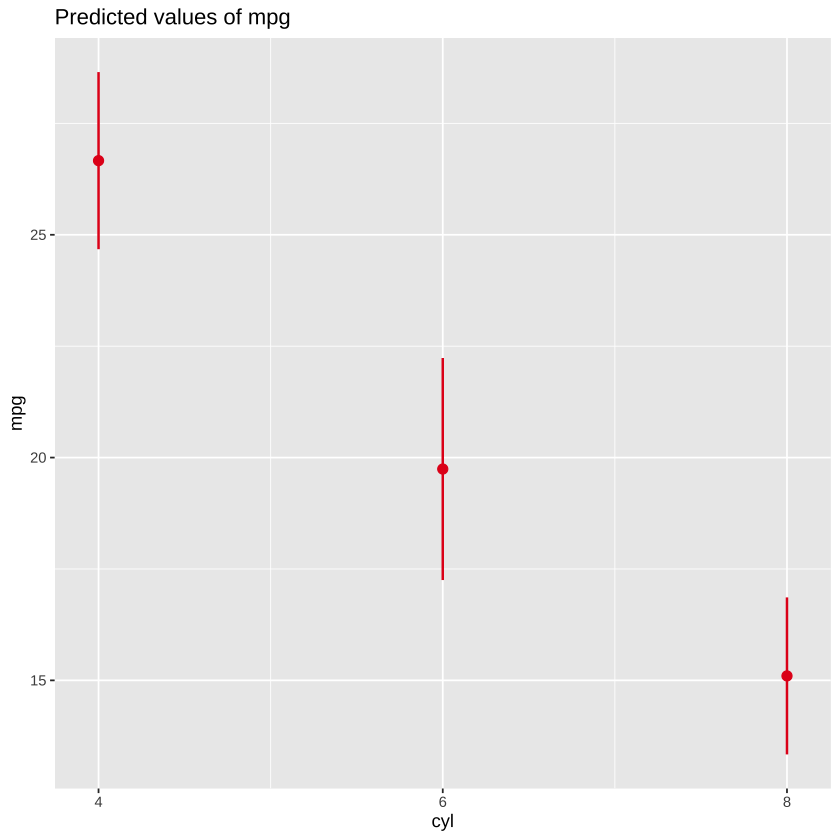

In [20]:
##liner model

m <- lm(mpg ~ cyl, d)
m %>%  summary()
plot_model(m, type = "pred", term = "cyl")

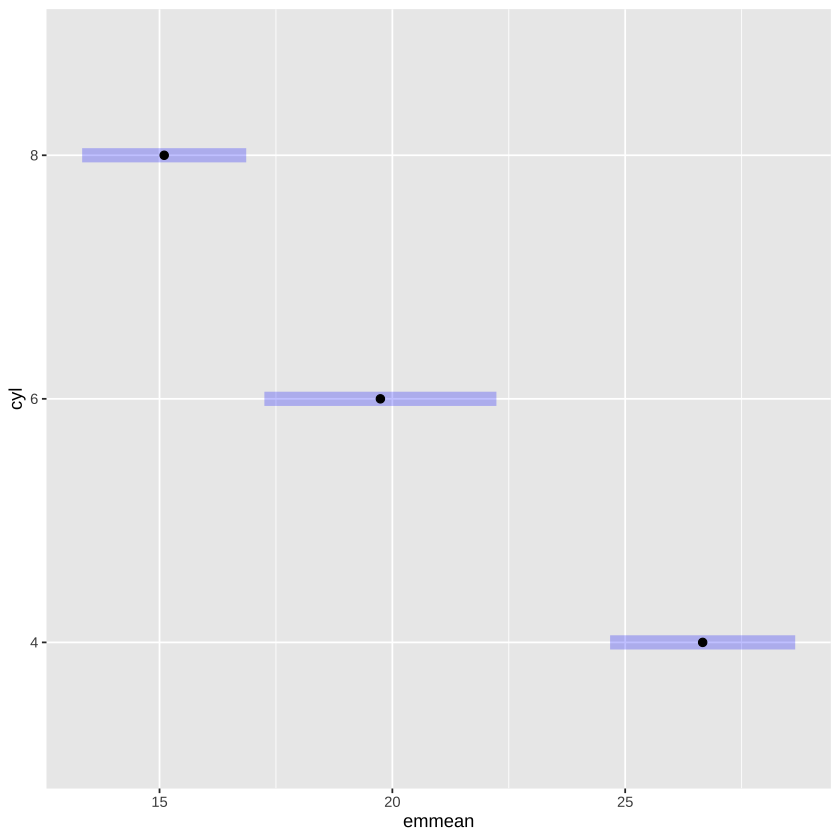

In [21]:
lm(mpg ~ cyl, d) %>%
emmeans(pairwise ~ cyl) %>% plot()

In [22]:
glm(am ~ cyl, d, family = binomial) %>%
emmeans( ~ cyl, type = "response") 

 cyl  prob     SE  df asymp.LCL asymp.UCL
 4   0.727 0.1343 Inf     0.414     0.910
 6   0.429 0.1870 Inf     0.144     0.770
 8   0.143 0.0935 Inf     0.036     0.427

Confidence level used: 0.95 
Intervals are back-transformed from the logit scale 

In [23]:
m <- lm(mpg ~ gear + am + hp, d)
ref_grid(m)
mean(d$hp)

 gear am  hp prediction    SE df
 3    0  147       18.0 0.818 27
 4    0  147       18.1 1.545 27
 5    0  147       20.4 2.331 27
 3    1  147       22.1 1.958 27
 4    1  147       22.2 1.226 27
 5    1  147       24.5 1.409 27


[1] 146.6875

In [24]:
m <- lm(mpg ~ cyl, d)
ref_grid(m)
emmeans(m, pairwise ~ cyl) %>% summary()

 cyl prediction    SE df
 4         26.7 0.972 29
 6         19.7 1.218 29
 8         15.1 0.861 29


,cyl,emmean,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,26.66364,0.9718008,29,24.67608,28.65119
2,6,19.74286,1.2182168,29,17.25132,22.23439
3,8,15.10000,0.8614094,29,13.33822,16.86178
,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cyl4 - cyl6,6.920779,1.558348,29,4.441099,3.423720e-04
2,cyl4 - cyl8,11.563636,1.298623,29,8.904534,2.543980e-09
3,cyl6 - cyl8,4.642857,1.492005,29,3.111825,1.122868e-02


In [25]:
emmeans(m, pairwise ~ cyl, adjust = "BH")$contrasts %>% summary()

,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cyl4 - cyl6,6.920779,1.558348,29,4.441099,1.792044e-04
2,cyl4 - cyl8,11.563636,1.298623,29,8.904534,2.570463e-09
3,cyl6 - cyl8,4.642857,1.492005,29,3.111825,4.152209e-03


In [26]:
emmeans(m, pairwise ~cyl, infer = T)$contrasts %>% summary()

,contrast,estimate,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cyl4 - cyl6,6.920779,1.558348,29,3.0722086,10.769350,4.441099,3.423720e-04
2,cyl4 - cyl8,11.563636,1.298623,29,8.3564942,14.770779,8.904534,2.543980e-09
3,cyl6 - cyl8,4.642857,1.492005,29,0.9581313,8.327583,3.111825,1.122868e-02


In [27]:
emmeans(m, ~ cyl)

 cyl emmean    SE df lower.CL upper.CL
 4     26.7 0.972 29     24.7     28.7
 6     19.7 1.218 29     17.3     22.2
 8     15.1 0.861 29     13.3     16.9

Confidence level used: 0.95 

##### plot any CIs

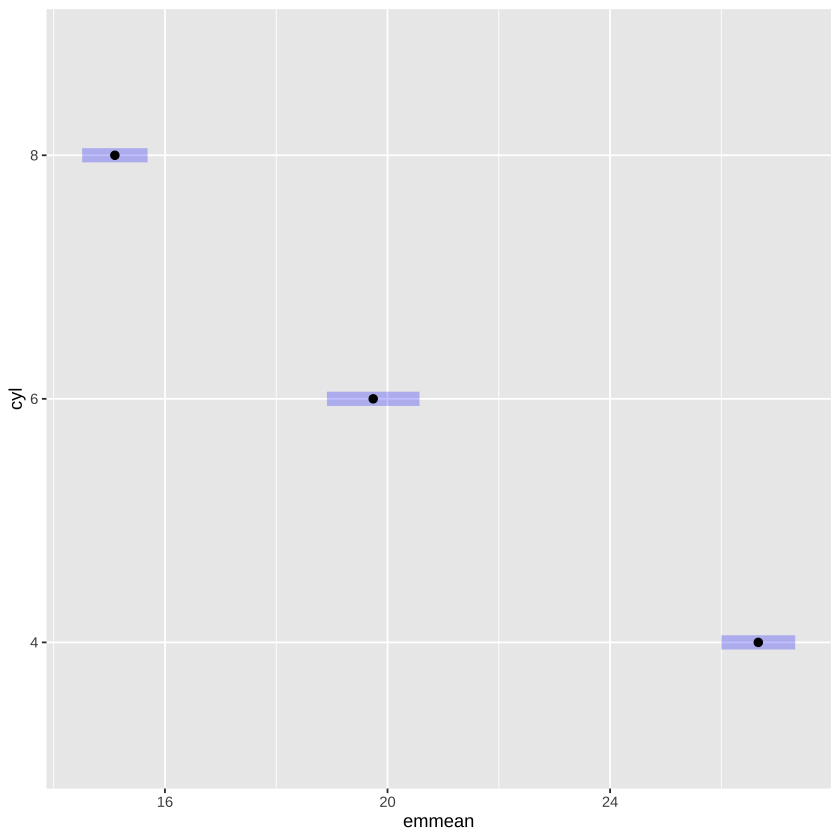

In [28]:
emmeans(m, pairwise ~ cyl, level = 0.5)$emmeans %>% plot()

## single numeric predictor

In [29]:
m <- lm(mpg ~ hp, d)
emmeans(m, ~ hp)

  hp emmean    SE df lower.CL upper.CL
 147   20.1 0.683 30     18.7     21.5

Confidence level used: 0.95 

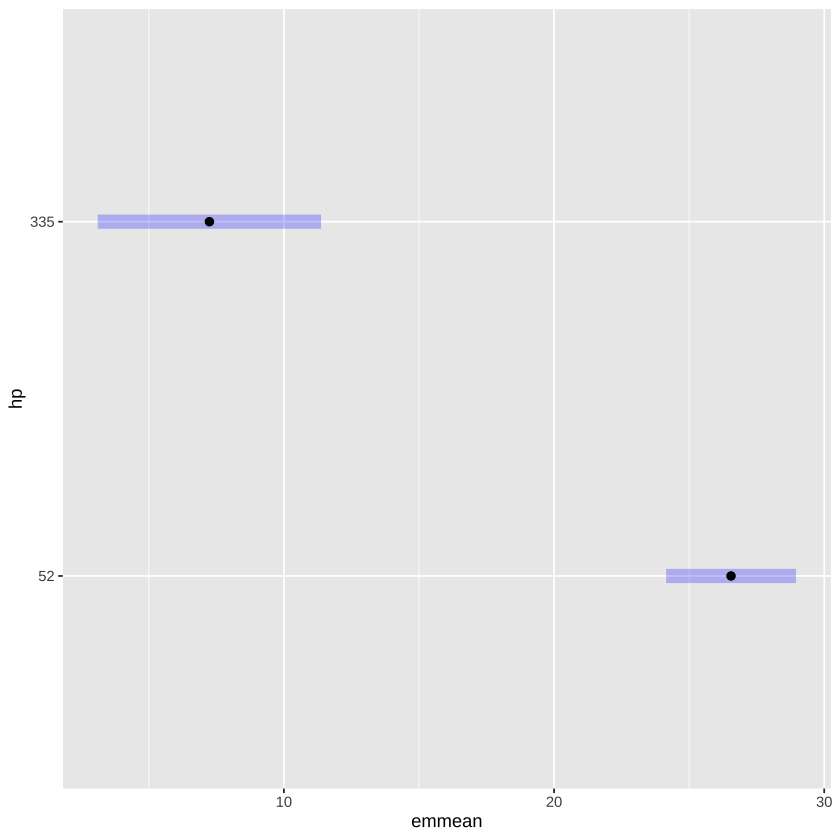

In [30]:
emmeans(m, ~ hp, cov.reduce = range) %>% plot()

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.



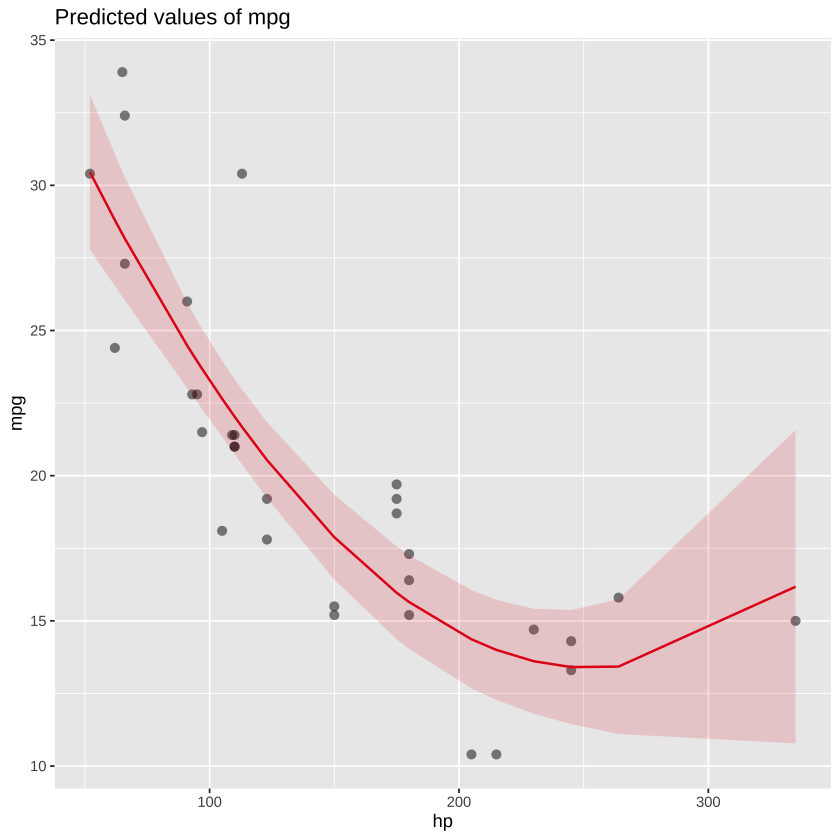

In [31]:
m1<- lm(mpg ~poly(hp, 2), d)
plot_model(m1, type = "pred", terms = "hp", show.data = T)

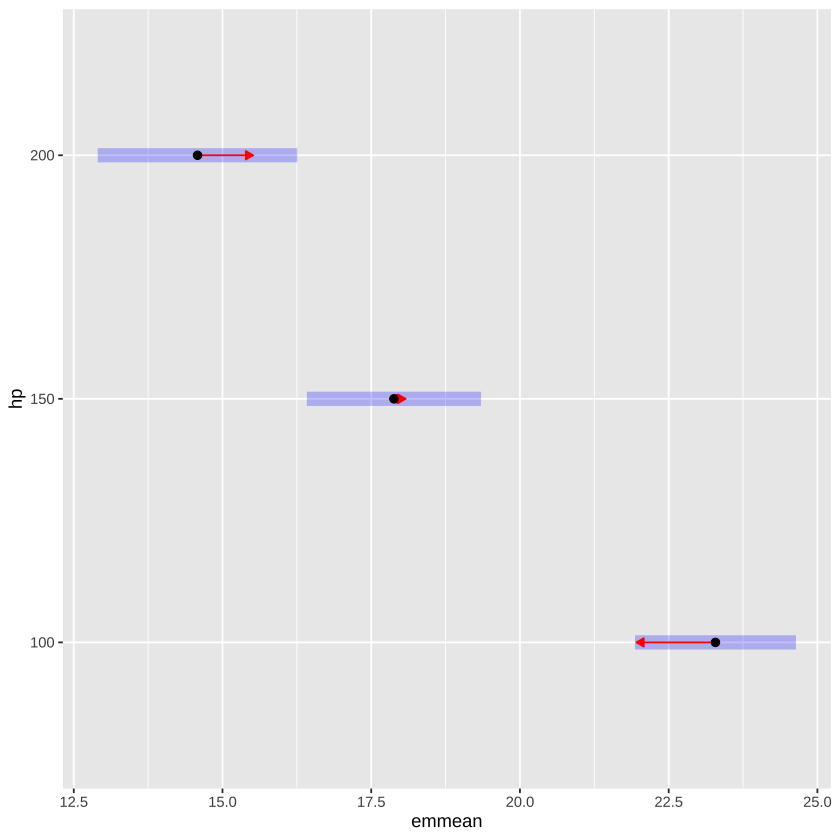

In [32]:
emmeans(m1, ~ hp, at = list(hp = c(100, 150, 200))) %>% plot(comparisons = T)

In [33]:
emmeans(m1, pairwise ~ hp, at = list(hp = c(100, 150, 200)))

$emmeans
  hp emmean    SE df lower.CL upper.CL
 100   23.3 0.662 29     21.9     24.6
 150   17.9 0.715 29     16.4     19.3
 200   14.6 0.820 29     12.9     16.3

Confidence level used: 0.95 

$contrasts
 contrast      estimate    SE df t.ratio p.value
 hp100 - hp150     5.41 0.616 29   8.768  <.0001
 hp100 - hp200     8.71 0.919 29   9.477  <.0001
 hp150 - hp200     3.30 0.404 29   8.173  <.0001

P value adjustment: tukey method for comparing a family of 3 estimates

## one categorical + one numeric

In [34]:
library(ISLR)
set.seed (10)
salary <- Wage %>% 
group_by(jobclass) %>% sample_n(50)

In [35]:
m <- lm(wage ~ jobclass + age, salary)

In [36]:
ref_grid(m)

 jobclass        age prediction   SE df
 1. Industrial  41.4       99.9 5.33 97
 2. Information 41.4      116.4 5.33 97


In [37]:
mno_age <- lm(wage ~ jobclass, salary)

In [38]:
AIC(m, mno_age)

,df,AIC
,<dbl>,<dbl>
m,4,1014.413
mno_age,3,1020.342


In [39]:
emmeans(m, ~jobclass)

 jobclass       emmean   SE df lower.CL upper.CL
 1. Industrial    99.9 5.33 97     89.4      111
 2. Information  116.4 5.33 97    105.8      127

Confidence level used: 0.95 

In [40]:
emmeans(m, pairwise ~ age|jobclass,
at = list(age = c(25,50,70)))$contrasts

jobclass = 1. Industrial:
 contrast      estimate    SE df t.ratio p.value
 age25 - age50    -22.8  8.06 97  -2.829  0.0155
 age25 - age70    -41.0 14.50 97  -2.829  0.0155
 age50 - age70    -18.2  6.45 97  -2.829  0.0155

jobclass = 2. Information:
 contrast      estimate    SE df t.ratio p.value
 age25 - age50    -22.8  8.06 97  -2.829  0.0155
 age25 - age70    -41.0 14.50 97  -2.829  0.0155
 age50 - age70    -18.2  6.45 97  -2.829  0.0155

P value adjustment: tukey method for comparing a family of 3 estimates 

In [41]:
emmeans(m, pairwise ~ age|jobclass,
at = list(age = c(25,50,70)))$emmeans

jobclass = 1. Industrial:
 age emmean    SE df lower.CL upper.CL
  25     85  7.33 97     70.4     99.5
  50    108  6.12 97     95.6    119.9
  70    126 10.86 97    104.5    147.6

jobclass = 2. Information:
 age emmean    SE df lower.CL upper.CL
  25    101  7.67 97     86.2    116.6
  50    124  5.90 97    112.5    135.9
  70    142 10.44 97    121.7    163.2

Confidence level used: 0.95 

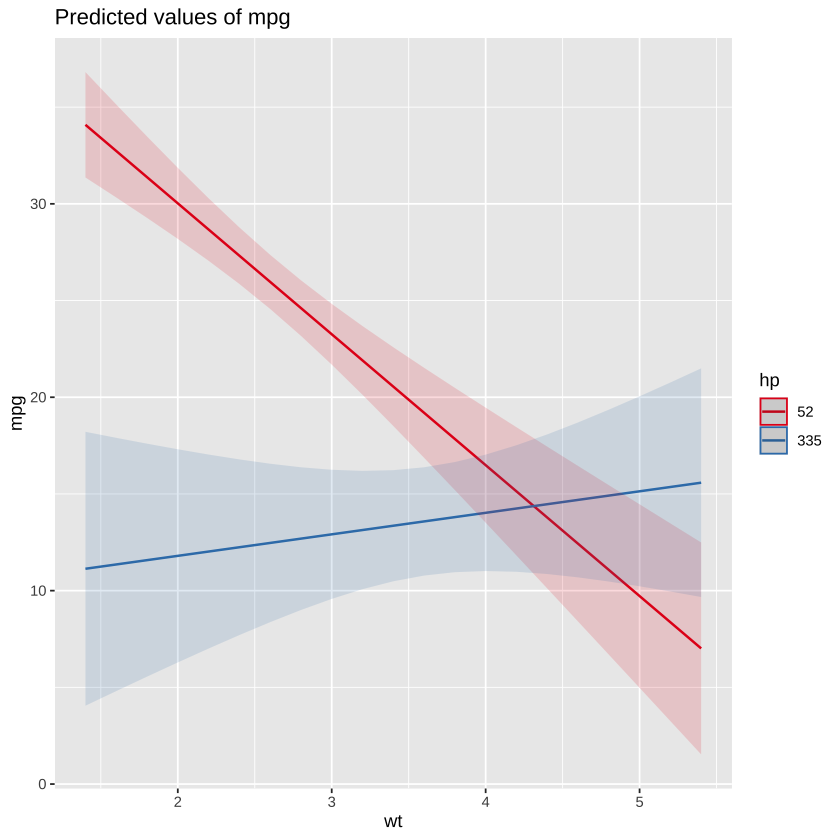

In [42]:
lm(mpg ~ hp * wt, d) %>% 
plot_model(type = "pred", terms = c( "wt", "hp[52,335]"))

In [43]:
lm(mpg ~ hp * wt, d) %>%
  emmeans(pairwise ~ hp | wt, cov.reduce = range.default)$contrasts

ERROR: Error in `$`(., emmeans(pairwise ~ hp | wt, cov.reduce = range.default), : 3 Argumente an '$' übergeben, welches 2 benötigt


: 

In [ ]:
set.seed(9999)
salary <- Wage %>% 
sample_n(100)
m <- lm(wage ~ education, salary)

In [ ]:
m <- lm(wage ~ education, salary)

In [ ]:
plot_model(m, type = "pred" ,term = "education",
show.data = T, jitter = T)

In [ ]:
#library(see)
check_normality(m) %>% plot(type = "qq")

In [ ]:
###bootstrapping##
boot_data <- bootstraps(salary, times = 1000)
boot_data$splits[[1]]
boot_models <- boot_data %>% 
mutate(model = map(splits, ~ lm(wage ~ 0 + education, data = salary)),
coefs = map(model, tidy))

In [ ]:
boot_data$splits[[1]]

In [ ]:
boot_models <- boot_data %>% 
mutate(model = map(splits, ~ lm(wage ~ 0 + education, data = salary)),
coefs = map(model, tidy))

In [ ]:
dlookr::describe(iris)

In [ ]:
ggbarstats(data = Wage, x = jobclass, y = education, label = "both")

In [ ]:
dlookr::describe(iris)

In [ ]:
dlookr::univar_numeric(iris)

In [ ]:
dlookr::diagnose_numeric(iris)

In [ ]:
library(SmartEDA)
ExpNumStat(iris, by = "GA" ,gp = "Species") 

In [ ]:
library(summarytools)
dfSummary(airquality)

In [ ]:
library(gtsummary)
mtcars %>% 
select(mpg,hp,am,gear,cyl) %>% tbl_summary()

#Wage %>%
  #select(age, wage, education,jobclass) %>%
  #tbl_summary(by = education) %>%
  #add_p()

In [ ]:
library(DataExplorer)

In [ ]:
plot_density(Wage)

In [ ]:
skewness(airquality$Ozone)
agostino.test(airquality$Ozone)


In [ ]:


skewness(airquality$Wind)
agostino.test(airquality$Wind)

In [ ]:
anscombe.test(airquality$Ozone)
anscombe.test(airquality$Wind)

In [ ]:
library(DataExplorer)
plot_qq(iris)
plot_qq(iris, by = "Species")

In [ ]:
iris %>% group_by(Species) %>% 
plot_normality(Petal.Length)

In [ ]:
library(ggpubr)
ggqqplot(iris, x = "Sepal.Length", facet.by = "Species", ggtheme = theme_classic()())

In [ ]:
normality(airquality) %>% 
mutate_if(is.numeric, ~ round (., 3)) %>% flextable()


In [ ]:
diamonds %>% 
group_by (cut, color, clarity) %>% 
normality()

In [ ]:
ggbetweenstats(data = iris, x = Species, y = Sepal.Length, type = "np")

In [ ]:

plot_correlate(airquality,method = "kendall")

#### Wilcoxon Rank sum test #### 
#### Mann-whitney test ####

In [ ]:
mannw <-read.csv("Mann_Whitneytest.csv")

In [ ]:
shapiro.test(mannw$Male)
shapiro.test(mannw$Female)

In [ ]:
library(dlookr)
mannw %>% 
normality()

In [ ]:
wilcox.test(mannw$Male,mannw$Female,
paired = FALSE,
exact = FALSE)

In [ ]:
library(ggstatsplot)
library(reshape2)

In [ ]:
mannlong <- melt(mannw)

In [ ]:
ggbetweenstats(data = mannlong,
x = variable,
y = value,
type = "np")

In [ ]:
library(effectsize)
interpret_rank_biserial(r = 0.28)

In [ ]:
??effectsize

#######Singlecellanalysis####

In [ ]:
library(readxl)

In [ ]:
ngs <- read.table("GSE103866_RSEM.SC-RNAseq.smartseq.txt", sep = "\t", header = T)
ngs

In [ ]:
library(dplyr)

# Assuming ngs is your data frame
ngs_posctrl <- ngs %>% 
  select(starts_with("H7TPS"))

ngs_negctrl <- ngs %>%
  select(starts_with("H7TNS"))

ngs_Epcamp <- ngs %>%
  select(starts_with("H7EPCAMSC"))

ngs_CD133PC <- ngs %>%
  select(starts_with("H7CD133SC"))



In [ ]:
ngs_CD133PC

In [ ]:
colnames(ngs_selected)

In [ ]:
ensembl <- read.csv("ensemble_ids-1.csv",header = T)


In [ ]:
colnames(ensembl)

In [ ]:
ensembl1 <- ensembl%>%
rename(symbol = ensemble_ids)

In [ ]:
ensembl1$symbol = str_split(ensembl1$symbol, pattern = "\\.", simplify = T)[,1]

In [ ]:
ensembl1

In [ ]:
library(BiocManager)

In [ ]:
library(Seurat)
library(DESeq2)

In [ ]:
library(readxl)
blood <- read_excel("wilcoxontest-1.xlsx")

In [ ]:
wilcox.test(blood$Before,blood$After,
paired = TRUE)


In [ ]:
library(effectsize)
interpret_rank_biserial(r = 0.889231)

In [ ]:
mm <-read_csv("income.data.csv", show_col_types = FALSE)

In [ ]:
install.packages("effects")
library(janitor)
library(effects)

Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig



In [ ]:
mm <- mm%>%
janitor::clean_names()
mm

s_no,income,happiness
<dbl>,<dbl>,<dbl>
1,3.862647,2.314489
2,4.979381,3.433490
3,4.923957,4.599373
4,3.214372,2.791114
5,7.196409,5.596398
6,3.729643,2.458556
7,4.674517,3.192992
8,4.498104,1.907137
9,3.121631,2.942450


In [ ]:
summary(mm)

      s_no           income        happiness    
 Min.   :  1.0   Min.   :1.506   Min.   :0.266  
 1st Qu.:125.2   1st Qu.:3.006   1st Qu.:2.266  
 Median :249.5   Median :4.424   Median :3.473  
 Mean   :249.5   Mean   :4.467   Mean   :3.393  
 3rd Qu.:373.8   3rd Qu.:5.992   3rd Qu.:4.503  
 Max.   :498.0   Max.   :7.482   Max.   :6.863  

In [ ]:
library(dlookr)
normality(mm)

vars,statistic,p_value,sample
<chr>,<dbl>,<dbl>,<dbl>
s_no,0.9547222,3.146273e-11,498
income,0.9518498,1.158988e-11,498
happiness,0.9870523,2.095229e-04,498


In [ ]:
imm <- lm(happiness ~ income, data = mm)

In [ ]:
plot(allEffects(imm))

In [ ]:
library(performance)
check_model(imm)

In [ ]:
plot_model(imm)

In [ ]:
plot_model(imm) # nolint

In [ ]:
install.packages("report")
library(report)


In [ ]:
report(imm)

In [ ]:
??emmeams

R Information

Vignettes with name or keyword or title matching ‘emmeams’ using fuzzy
matching:


emmeans::AQuickStart    A quick-start guide for emmeans
emmeans::FAQs           FAQs for emmeans
emmeans::interactions   Interaction analysis in emmeans
emmeans::models         Models supported by emmeans
emmeans::predictions    Prediction in emmeans
emmeans::sophisticated
                        Sophisticated models in emmeans
emmeans::xtending       For developers: Extending emmeans


Type 'vignette("FOO", package="PKG")' to inspect entries 'PKG::FOO'.



Help files with alias or concept or title matching ‘emmeams’ using
fuzzy matching:


broom::tidy.emmGrid     Tidy a(n) emmGrid object
  Concepts: emmeans tidiers
broom::tidy.lsmobj      Tidy a(n) lsmobj object
  Aliases: emmeans_tidiers
  Concepts: emmeans tidiers
broom::tidy.ref.grid    Tidy a(n) ref.grid object
  Concepts: emmeans tidiers
broom::tidy.summary_emm
                        Tidy a(n) summary_emm object
  Concepts: emmeans 

In [ ]:
'vignette("FOO", package="emmeans")'

[1] "vignette(\"FOO\", package=\"emmeans\")"

In [1]:
install.packages("BiocManager")

Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig



In [5]:
find.package("limma")

[1] "/Volumes/NGS/conda/miniconda3/envs/akms/lib/R/library/limma"